### Zadanie 3: Zapytania SQL do bazy danych Chinook - część I

Baza danych Chinook to przykładowa baza muzyczna, zawierająca tabele związane z artystami, albumami, utworami, gatunkami muzycznymi oraz zakupami klientów. Twoim zadaniem jest wykonanie 20 podzadań, które sprawdzą podstawowe umiejętności odpytywania bazy danych oraz umiejętność wykorzystywania funkcji agregujących i grupowania.

Struktura tabel bazy Chinook

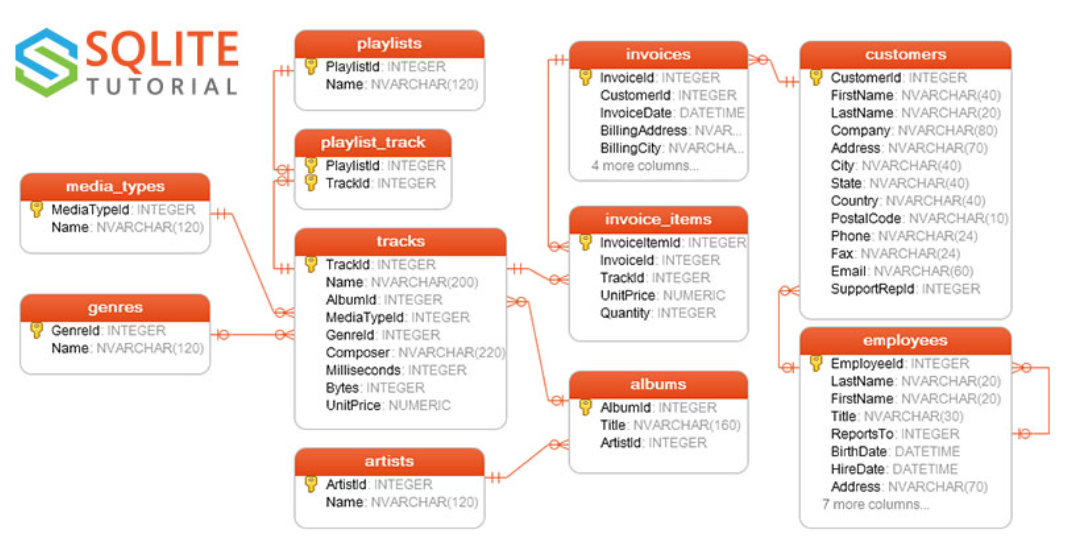

#### Wypisz wszystkie utwory z tabeli Track.

SELECT * FROM Track;

#### Wypisz tytuły i kompozytorów wszystkich utworów.

SELECT Name, Composer FROM Track;

#### Wypisz nazwy wszystkich albumów.

SELECT Title FROM Album;

#### Wypisz imiona i nazwiska wszystkich artystów.

SELECT Name FROM Artist;

#### Wypisz nazwy utworów z albumu o tytule 'Let There Be Rock'.

SELECT Track.Name \
FROM Track \
JOIN Album ON Track.AlbumId = Album.AlbumId \
WHERE Album.Title = 'Let There Be Rock';

#### Wypisz imiona i nazwiska klientów oraz nazwy państw, z których pochodzą.

SELECT FirstName, LastName, Country FROM Customer;

#### Wypisz nazwę albumu i nazwę artysty dla każdego albumu.

SELECT Album.Title, Artist.Name \
FROM Album \
JOIN Artist ON Album.ArtistId = Artist.ArtistId;

#### Wypisz tytuły utworów i nazwy gatunków.

SELECT Track.Name, Genre.Name AS GenreName \
FROM Track \
JOIN Genre ON Track.GenreId = Genre.GenreId;

#### Wypisz nazwy utworów, które trwają dłużej niż 300000 ms (5 minut).

SELECT Name \
FROM Track \
WHERE Milliseconds > 300000;

#### Wypisz nazwy albumów oraz całkowity czas trwania utworów na każdym albumie (w milisekundach).

SELECT Album.Title, SUM(Track.Milliseconds) AS TotalDuration \
FROM Album \
JOIN Track ON Album.AlbumId = Track.AlbumId \
GROUP BY Album.Title;

#### Wypisz nazwiska klientów i całkowitą kwotę ich zakupów.

SELECT Customer.LastName, SUM(Invoice.Total) AS TotalSpent \
FROM Customer \
JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId \
GROUP BY Customer.LastName;

#### Wypisz liczbę utworów w każdym albumie.

SELECT Album.Title, COUNT(Track.TrackId) AS TrackCount \
FROM Album \
JOIN Track ON Album.AlbumId = Track.AlbumId \
GROUP BY Album.Title;

#### Wypisz nazwiska pracowników oraz nazwy ich działów.

SELECT Employee.LastName, Employee.Title \
FROM Employee;

#### Wypisz nazwiska pracowników oraz nazwiska ich menedżerów.

SELECT e1.LastName AS Employee, e2.LastName AS Manager \
FROM Employee e1 \
LEFT JOIN Employee e2 ON e1.ReportsTo = e2.EmployeeId;

#### Wypisz nazwy gatunków oraz liczbę utworów w każdym gatunku.

SELECT Genre.Name, COUNT(Track.TrackId) AS TrackCount \
FROM Genre \
JOIN Track ON Genre.GenreId = Track.GenreId \
GROUP BY Genre.Name;

#### Wypisz nazwy playlist oraz liczbę utworów na każdej z nich.

SELECT Playlist.Name, COUNT(PlaylistTrack.TrackId) AS TrackCount \
FROM Playlist \
JOIN PlaylistTrack ON Playlist.PlaylistId = PlaylistTrack.PlaylistId \
GROUP BY Playlist.Name;

#### Wypisz tytuły utworów i nazwy mediów, na których są dostępne.

SELECT Track.Name, MediaType.Name AS MediaType \
FROM Track \
JOIN MediaType ON Track.MediaTypeId = MediaType.MediaTypeId;

#### Wypisz nazwy krajów oraz liczbę klientów z każdego kraju.

SELECT Country, COUNT(CustomerId) AS CustomerCount \
FROM Customer \
GROUP BY Country;

#### Wypisz nazwy albumów, które zawierają utwory z gatunku 'Rock'.

SELECT DISTINCT Album.Title \
FROM Album \
JOIN Track ON Album.AlbumId = Track.AlbumId \
JOIN Genre ON Track.GenreId = Genre.GenreId \
WHERE Genre.Name = 'Rock';

#### Wypisz imiona, nazwiska klientów oraz liczby ich zamówień.

SELECT Customer.FirstName, Customer.LastName, COUNT(Invoice.InvoiceId) AS OrderCount \
FROM Customer \
JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId \
GROUP BY Customer.FirstName, Customer.LastName;